In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#file handling
import os
#from google.colab import files

# data preprocessing
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# model selection
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,plot_roc_curve,classification_report,accuracy_score,confusion_matrix)

In [3]:
os.environ['KAGGLE_USERNAME'] = "minkewang" # username
os.environ['KAGGLE_KEY'] = "4ac64942fb1cdf679a628708e3cae405" # key

In [6]:
dbdata = pd.read_csv('archive.zip', compression='zip', header=0, sep=',', quotechar='"',thousands=r',',encoding= 'unicode_escape')

In [7]:
dbdata.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
40,3,180,64,25,70,34.0,0.271,26,0
647,0,179,50,36,159,37.8,0.455,22,1
704,4,110,76,20,100,28.4,0.118,27,0
684,5,136,82,0,0,0.0,0.640,69,0
755,1,128,88,39,110,36.5,1.057,37,1


In [8]:
dbdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dbdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
dbdata.corr().style.background_gradient(cmap = plt.cm.Blues)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the above correlation plot we can see that there is no sever multicoilearity problem with the dataset

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


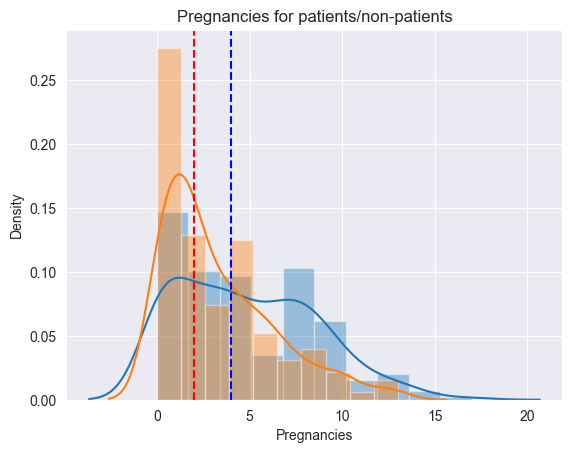

In [14]:
## patients with diabetes seem to have a normally distributed pregnancies times
sns.distplot(dbdata[dbdata['Outcome']==1]['Pregnancies'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Pregnancies'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Pregnancies for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Pregnancies']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Pregnancies']),color='blue', linestyle='--')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


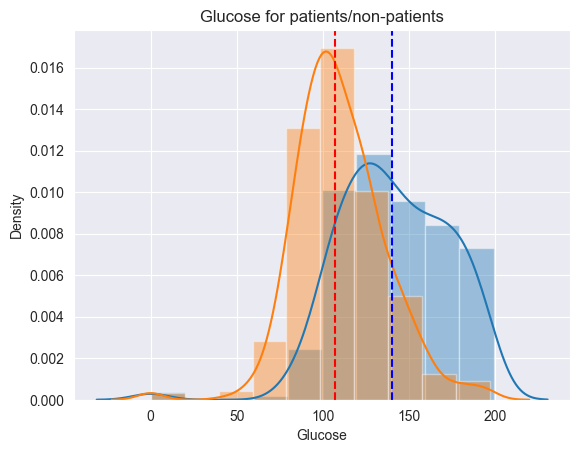

In [15]:
## Glucose level
sns.distplot(dbdata[dbdata['Outcome']==1]['Glucose'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Glucose'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Glucose for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Glucose']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Glucose']),color='blue', linestyle='--')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


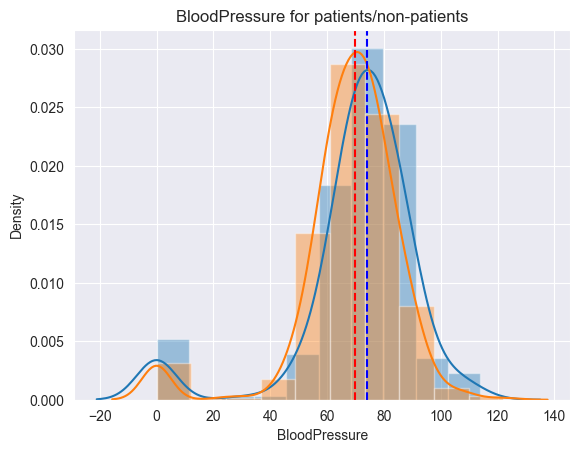

In [17]:
## BloodPressure
sns.distplot(dbdata[dbdata['Outcome']==1]['BloodPressure'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['BloodPressure'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('BloodPressure for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['BloodPressure']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['BloodPressure']),color='blue', linestyle='--')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


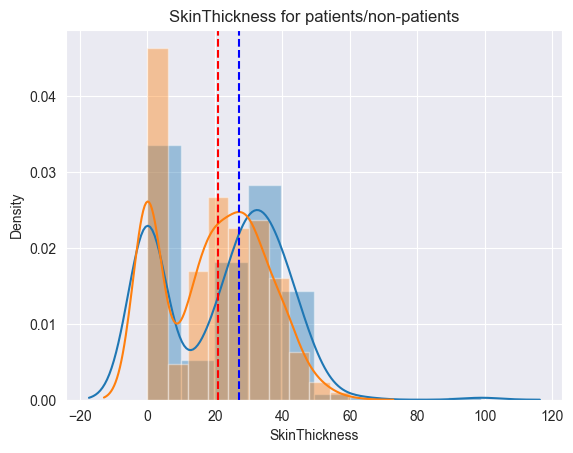

In [18]:
## SkinThickness
sns.distplot(dbdata[dbdata['Outcome']==1]['SkinThickness'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['SkinThickness'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('SkinThickness for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['SkinThickness']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['SkinThickness']),color='blue', linestyle='--')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


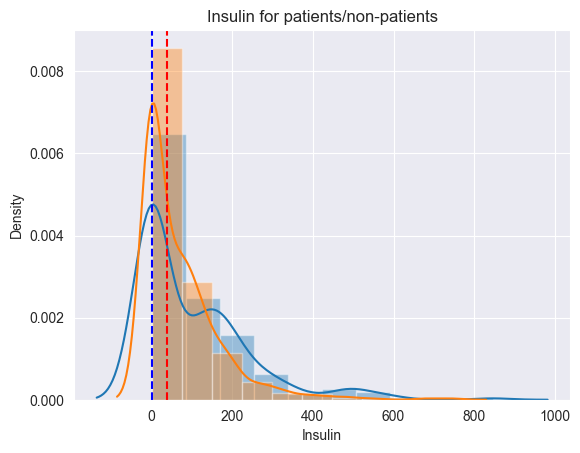

In [19]:
## Insulin
sns.distplot(dbdata[dbdata['Outcome']==1]['Insulin'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Insulin'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Insulin for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Insulin']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Insulin']),color='blue', linestyle='--')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


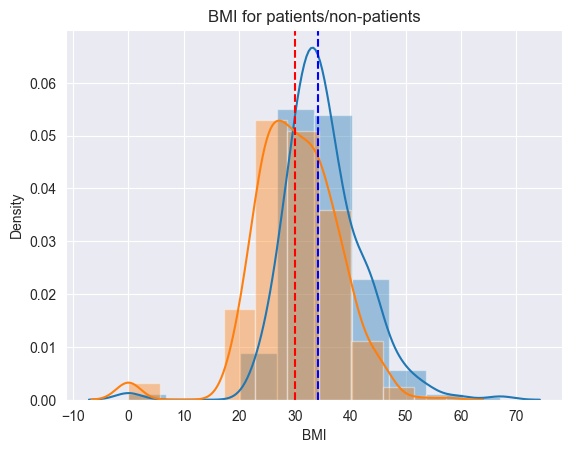

In [20]:
## BMI
sns.distplot(dbdata[dbdata['Outcome']==1]['BMI'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['BMI'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('BMI for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['BMI']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['BMI']),color='blue', linestyle='--')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


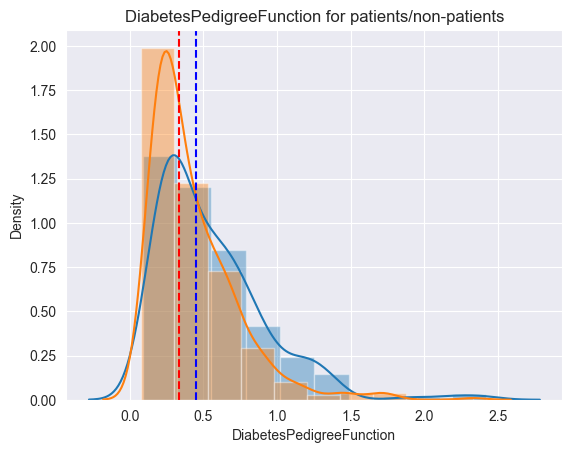

In [21]:
## DiabetesPedigreeFunction
sns.distplot(dbdata[dbdata['Outcome']==1]['DiabetesPedigreeFunction'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['DiabetesPedigreeFunction'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('DiabetesPedigreeFunction for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['DiabetesPedigreeFunction']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['DiabetesPedigreeFunction']),color='blue', linestyle='--')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


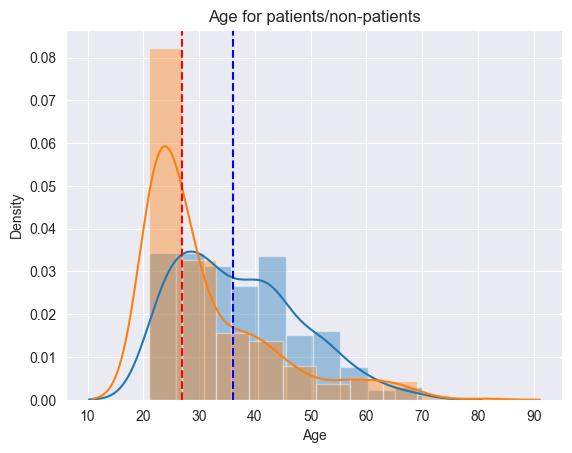

In [22]:
## Age
sns.distplot(dbdata[dbdata['Outcome']==1]['Age'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Age'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Age for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Age']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Age']),color='blue', linestyle='--')

In [23]:
dbdata['Outcome'].value_counts()/len(dbdata)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Pridiction: Diabetes Diagnosis

Standardize and split train test dataset

In [24]:
#Define X, y variable Standardization
y=dbdata.iloc[:,-1]
std = StandardScaler()                 # scale numeric columns
X = pd.DataFrame(std.fit_transform(dbdata.iloc[:,:-1]),columns=dbdata.iloc[:,:-1].columns)

In [25]:
#Split train test dataset
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.25, random_state=0)

### Define Function for model and evaluation

(confusion, matrix, precision,recall, ROC,AUC)

In [26]:
def model_prediction(algorithm, X_train, X_test, y_train):
  algorithm_fit = algorithm.fit(X_train, y_train)
  predictions  = algorithm.predict(X_test)
  probabilities = algorithm.predict_proba(X_test)
  return algorithm_fit, predictions, probabilities

In [27]:
def prediction(algorithm, X_train, X_test, y_train, y_test) :

    # model prediction
    algorithm_fit, predictions, probabilities = model_prediction(algorithm, X_train, X_test, y_train)

    # print summary
    print ("\n Classification report : \n", classification_report(y_test, predictions))
    print ("Accuracy   Score : ", accuracy_score(y_test, predictions))

    # plot confusion matrix
    plot_confusion_matrix(algorithm_fit, X_test, y_test, cmap=plt.cm.Blues,display_labels=['No Diabetes','Diabetes'])
    plt.title('Confusion Matrix')

    # plot roc curve
    plot_roc_curve(algorithm_fit, X_test, y_test)
    ax = plt.gca()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.title('Receiver Operating Characteristic')

### Logisric Regression

Fitting 5 folds for each of 40 candidates, totalling 200 fits

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

Accuracy   Score :  0.8020833333333334


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\

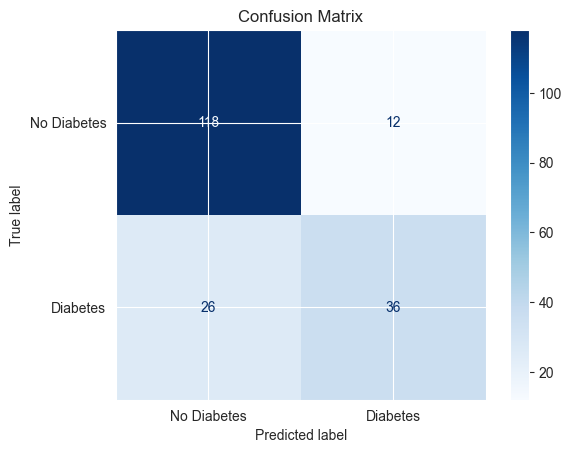

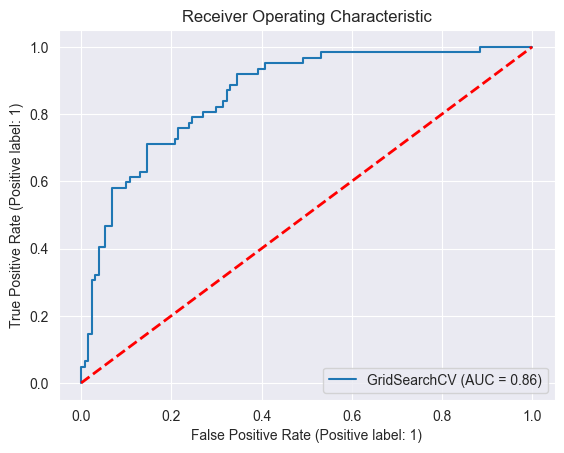

In [28]:
##logistic regression classifier with hyperparameter tuning using GridSearchCV
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logit = GridSearchCV(LogisticRegression(random_state=0),parameters,cv = 5, verbose=True, n_jobs=-1)
prediction(logit,X_train, X_test, y_train, y_test)